In [1]:
# Add local scripts to module search path
import sys
import os
sys.path.append(os.path.realpath('../toliman-proper'))

# Testing of wavefront tilt in a simple single-lens/mirror system

Generate PSFs for a range of tilts in the x and y directions, using a minimal optical system of a single simple (quadratic phase) lens to focus incident wavefront to point in focal plane.

The optical system is built in `prescription_quad.py`, which uses the tilt code I've implemented in `prop_tilt.py`.


In [2]:
prescription_vals = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    }
prescription_vals['beam_ratio'] = 0.2
prescription_vals['tilt_x'] = 0.00
prescription_vals['tilt_y'] = 0.00


In [3]:
import matplotlib.pylab as plt
import proper
import numpy as np

def plot_tilted_psfs(prescription,
                    prescription_vals,
                    offsets_x = [-2., -1., 0., 1., 2.],
                    offsets_y = [-2., -1., 0., 1., 2.],
                    wavelength=0.6,
                    gridsize = 2048, #512
                    sz = 80):
    c = int(gridsize/2)

    fig, axes = plt.subplots(nrows=len(offsets_x), ncols=len(offsets_y),sharex=True, sharey=True)
    it = iter(axes.flat)
    for dx in offsets_x:
        for dy in offsets_y:
            prescription_vals['tilt_x'] = dx
            prescription_vals['tilt_y'] = dy
            (wavefront, sampling) = proper.prop_run(prescription, wavelength, gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=prescription_vals)
            ax = next(it)
            im = ax.imshow(np.log10(wavefront[c-sz:c+sz, c-sz:c+sz]), interpolation = 'sinc', cmap='viridis', clim=[-7, -1.6])
    fig.subplots_adjust(hspace=0, wspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes], visible=False)
    plt.setp([a.get_yticklabels() for a in fig.axes], visible=False)
    plt.setp([a.get_yticklabels() for a in fig.axes[::len(offsets_x)]], visible=True)
    plt.setp([a.get_xticklabels() for a in fig.axes[-len(offsets_x):]], visible=True)
    fig.colorbar(im, ax=axes.ravel().tolist())
    plt.show()

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


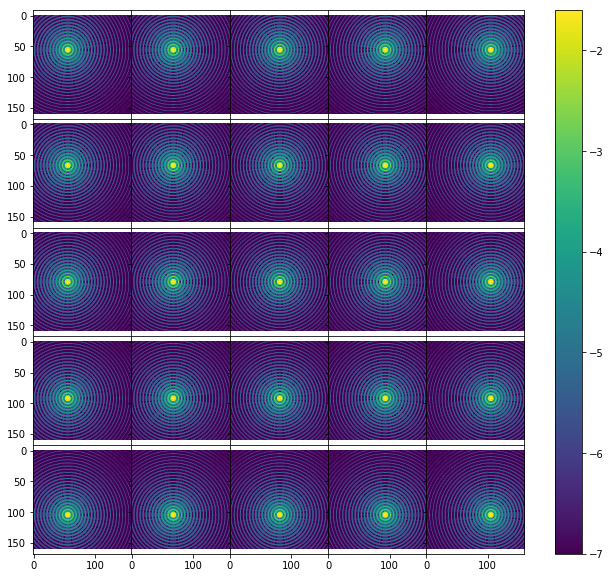

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (11,10)

plot_tilted_psfs('prescription_quad', prescription_vals)


~~I'd assumed the PSF would be translated in x and y with some small abberations, but the horizontal and vertical artefacts visible at increasing tilt angle are a surprise.~~ What about performing the phase shift later?

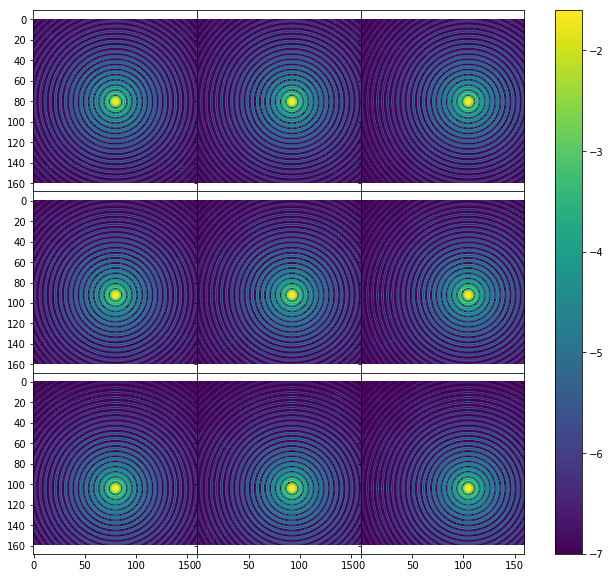

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (11,10)

plot_tilted_psfs('prescription_quad_tiltafter', prescription_vals, offsets_x = [0., 1., 2.], offsets_y = [0., 1., 2.])


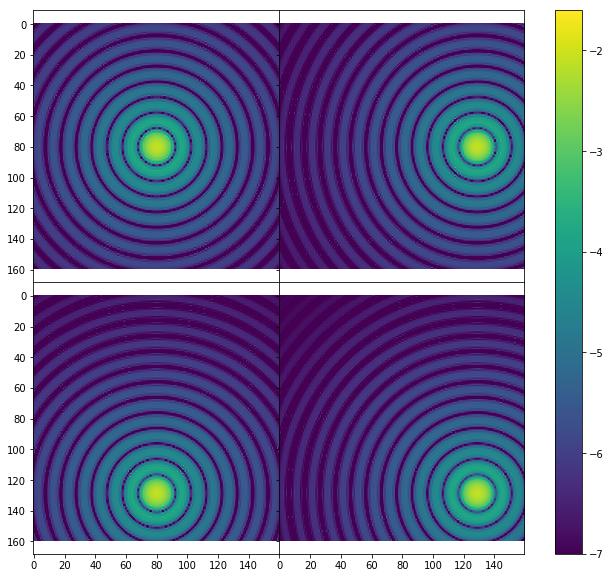

In [6]:
# Try reducing the beam ratio to up the sampling 
%matplotlib inline
plt.rcParams["figure.figsize"] = (11,10)
prescription_vals['beam_ratio'] = 0.1
plot_tilted_psfs('prescription_quad', prescription_vals, offsets_x = [0., 2.], offsets_y = [0., 2.])


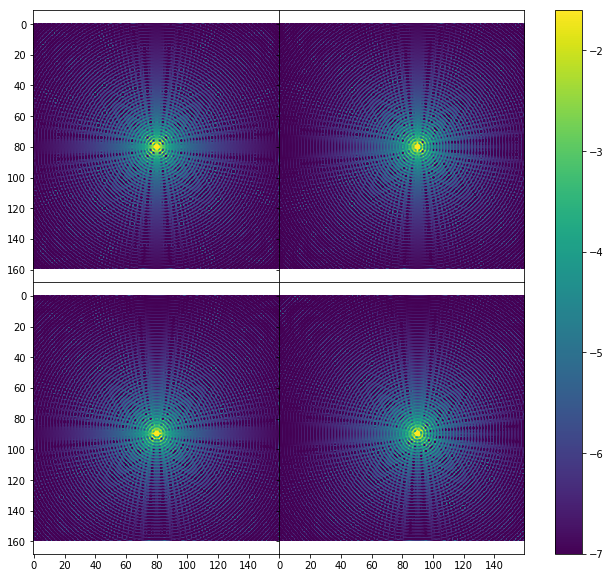

In [7]:
# Check whether things improve changing the sampling the other way
%matplotlib inline
plt.rcParams["figure.figsize"] = (11,10)
prescription_vals['beam_ratio'] = 0.5
plot_tilted_psfs('prescription_quad', prescription_vals, offsets_x = [0., 2.], offsets_y = [0., 2.])